In [15]:
using ramnet
using Images
using MLDatasets

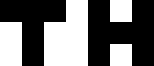

In [2]:
T = Bool[0 0 0; 1 0 1; 1 0 1]
H = Bool[0 1 0; 0 0 0; 0 1 0]

mosaicview(Gray.(T), Gray.(H); nrow=1, npad=1, fillvalue=1)

In [4]:
X, y = [reshape(T, (1,:)); reshape(H, (1,:))], ["T", "H"]

model = MultiDiscriminatorClassifier{String}(9, 3; seed=1)

train!(model, X, y)

In [5]:
predict(model, X)

2-element Array{String,1}:
 "T"
 "H"

Testing with novel data:

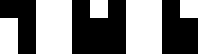

In [10]:
kinda_T = Bool[0 0 1; 1 0 1; 1 0 1]
kinda_H = Bool[0 1 0; 0 0 0; 0 0 0]
kinda_nothing = Bool[1 0 1; 1 0 0; 1 0 0]

mosaicview(Gray.(kinda_T), Gray.(kinda_H), Gray.(kinda_nothing); nrow=1, npad=1, fillvalue=1)

In [13]:
X_test = [reshape(kinda_T, (1,:)); reshape(kinda_H, (1,:)); reshape(kinda_nothing, (1,:))]

predict(model, X_test)

3-element Array{String,1}:
 "T"
 "H"
 "T"

MNIST:

In [74]:
X_train = transpose(reshape(MNIST.traintensor(), 784, :)) .> 0.5
y_train = MNIST.trainlabels()

X_test = transpose(reshape(MNIST.testtensor(), 784, :)) .> 0.5
y_test = MNIST.testlabels()

model_digits = MultiDiscriminatorClassifier{Int64}(784, 28; seed=1)

time_train!(model, X, y) = @time train!(model, X, y)

time_train!(model_digits, X_train, y_train)

  1.547073 seconds (6.84 M allocations: 459.153 MiB, 8.93% gc time)


In [73]:
function accuracy(y_pred, y_target)
    sum(y_pred .== y_target)/length(y_pred)
end

time_accuracy(y_pred, y_target) = @time accuracy(y_pred, y_target)

time_accuracy (generic function with 1 method)

In [76]:
time_accuracy(predict(model_digits, X_test), y_test)

  0.000919 seconds (3 allocations: 5.547 KiB)


0.8104

This result is similar to what I get with `wisardpkg` with bleaching **deactivated** but worst then the accuracy when it's activated